In [1]:
import local_load_data as ldata
import local_param as pm
import clean_data as cdata
import warnings
warnings.filterwarnings("ignore")
data_All_years = ldata.start_load(pm.csv_file)


Total Population involed in all traffic accidents:  6772563

Total number of all traffic accidents:  2570235


In [2]:
#data_years = ldata.get_TrafficData_CSV_year(data_All_years,pm.y_start,pm.y_end)

In [3]:
data_cleaned = cdata.data_clean_columns(data_All_years,pm.columns_clean,v_num=pm.v_num)

In [4]:
data_cleaned = cdata.modify_data(data_cleaned,pm.columns_grp)

In [5]:
data_cleaned['P_ISEV'].shape

(1087078,)

In [6]:
cdata.get_data_stats(data_cleaned,pm.columns_stats)

C_YEAR column data is distributed as below: 

2015    0.080371
2016    0.078234
2010    0.068632
2011    0.067850
2012    0.067016
2004    0.064925
2017    0.060459
2014    0.059459
2008    0.057426
2013    0.051959
2003    0.051213
2009    0.049444
2007    0.048090
2001    0.042086
2002    0.040916
2006    0.040626
2005    0.040182
2000    0.015711
1999    0.015400
Name: C_YEAR, dtype: float64
Total size : (1087078,)
C_VEHS column data is distributed as below: 

2    1.0
Name: C_VEHS, dtype: float64
Total size : (1087078,)
C_RSUR column data is distributed as below: 

1    0.709814
2    0.205385
3    0.036427
5    0.034963
4    0.011940
6    0.001008
7    0.000332
8    0.000118
9    0.000013
Name: C_RSUR, dtype: float64
Total size : (1087078,)
C_RALN column data is distributed as below: 

1    0.816733
2    0.102767
3    0.044640
4    0.025428
5    0.006392
6    0.004039
Name: C_RALN, dtype: float64
Total size : (1087078,)
C_WTHR column data is distributed as below: 

1    0.733776
3 

In [7]:
import creat_ML_data as MLdata

In [8]:
data_selected = MLdata.create_data_for_ML(data_cleaned, pm.traffic_data_headers, pm.dummy_fields, pm.regression)

In [9]:
test_data, train_x, test_x, train_y, test_y = MLdata.train_test_data(data_selected,pm.time,pm.test_size,pm.year,pm.interval,pm.traffic_data_headers)

In [10]:
import LR_model_present as LRmp
import Tree_model_present as Tmp

1：No Injury
 2:Injury
 3:Fatal

tree parameter {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
tree depth 1
Decision Tree Train Accuracy :  0.2334978861393797 

Decision Tree Test Accuracy :  0.22521453350374293 

tree parameter {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
tree depth 2
Decision Tree Train Accuracy :  0.5027062115583824 

Decision Tree Test Accuracy :  0.5050514271803299 

tree parameter {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 

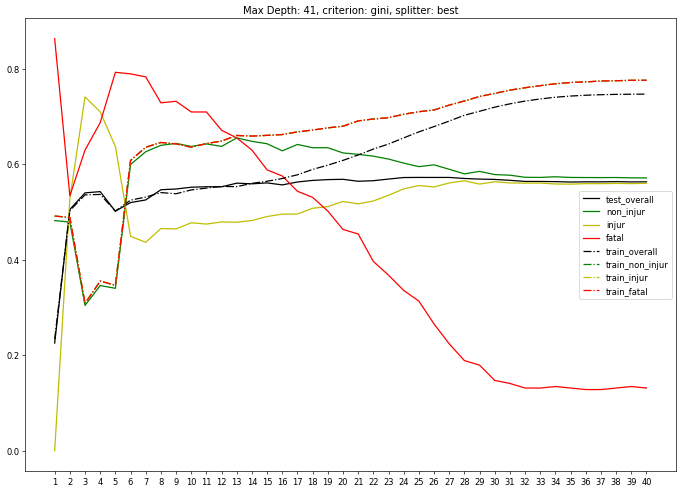

In [11]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
if pm.regression =='lr':
  file_name = 't_{}_tst{}_trn{}_C_{}_pnt_{}_cw_{}_mltc_{}_svr_{}_cv_{}'.format(pm.time,pm.year,pm.interval,pm.C,pm.penalty,pm.classweight,pm.multi_class,pm.solver,pm.cv)
  result, all_model = LRmp.build_model_LR(train_x,train_y,test_x,test_y,pm.C,pm.penalty,pm.classweight,pm.multi_class,pm.solver,pm.cv)
elif pm.regression =='tree':
  file_name = 't_{}_tst{}_trn{}_dep_{}_splt_{}_crt_{}_cw_{}'.format(pm.time,pm.year,pm.interval,pm.max_dep,pm.split_type,pm.crt_type,pm.classweight)
  result, all_model = Tmp.build_model_tree(train_x,train_y,test_x,test_y,pm.max_dep,pm.split_type,pm.crt_type,pm.classweight)

In [12]:
orders = ['Accuracy']  + [col for col in result if col != 'Accuracy']
result = result[orders]
result.to_csv(pm.regression+'_accuracy_result'+file_name+'.csv') 
import local_Result_Analysis as RA
allmodel_Acc_error_mean_sqrt,allmodel_victim_error_mean_sqrt,allmodel_Acc_error_mean,allmodel_victim_error_mean = RA.compare_model(test_data, test_x, all_model,pm.money_path)
allmodel_Acc_error_mean_sqrt.to_csv(file_name+'allmodel_Acc_error_mean_sqrt.csv')
allmodel_victim_error_mean_sqrt.to_csv(file_name+'allmodel_victim_error_mean_sqrt.csv')
allmodel_Acc_error_mean.to_csv(file_name+'allmodel_Acc_error_mean.csv')
allmodel_victim_error_mean.to_csv(file_name+'allmodel_victim_error_mean.csv')


model 0: 
 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

model 1: 
 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

model 2: 
 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

model 3: 
 {'class_weight': 'bala